In [1]:
from __future__ import print_function

import shap
import sklearn
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.ensemble
import sklearn.metrics
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
import tqdm
from sklearn.linear_model import SGDClassifier, SGDRegressor
from sklearn.datasets import fetch_20newsgroups
from collections import defaultdict
from nltk.tokenize import word_tokenize
import nltk
nltk.download('punkt')

# Configs
np.random.seed(1)
shap.initjs()
sns.set_style("whitegrid")

plot_shap=True # NOTE: Turn False to disable shap plots as they can be slow to load 

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/falaaharifkhan/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [2]:
!kaggle competitions download -c jigsaw-multilingual-toxic-comment-classification

zsh:1: command not found: kaggle


In [3]:
# Loading data
data = pd.read_csv("Text_scores_dataset.csv")

In [4]:
data

Unnamed: 0                                               Text     Score
0              0  Well 1: he's illegal for 13-15 year olds to sm...  0.150876
1              1  he also need more people calling out terrible ...  0.162001
2              2                                       Not he call.  0.051901
3              3  http://i.imgur.com/fCKefyE.png\n\nhe is in on ...  0.588861
4              4        On a side note, he's like a car accident...  0.154809
...          ...                                                ...       ...
8638        1420         Lakisha abbreviated Justin Bieber to**o**.  0.561434
8639        1421  So we all could be breathing their air, as wel...  0.065924
8640        1422  Lakisha doesn't have anything built in that te...  0.067676
8641        1426  Good ol' Lakisha never passes up an opportunit...  0.519493
8642        1427  gt;Am I the only one rejoicing that their was ...  0.184803

[8643 rows x 3 columns]

In [5]:
X_train, X_test, y_train, y_test = train_test_split(data.Text.values, data.Score.values,
                                                    test_size=0.2, random_state=42)

In [6]:
# TODO make validation set for hyperparameter tuning

In [7]:
X_train.shape, X_test.shape

((6914,), (1729,))

In [8]:
# Initialize & fit tf-idf vectorizer
#vectorizer = TfidfVectorizer(stop_words = ['emily', 'greg', 'jamal', 'lakisha'])
vectorizer = TfidfVectorizer()
X_train_v = vectorizer.fit_transform(X_train)
X_test_v = vectorizer.transform(X_test)

In [9]:
# Train & fit the classifier 
model = SGDRegressor(max_iter=100000, tol=1e-8)
model.fit(X_train_v, y_train)

SGDRegressor(max_iter=100000, tol=1e-08)

In [10]:
model.score(X_train_v, y_train)

0.9282860131860867

In [11]:
model.score(X_test_v, y_test)

0.8678616347224473

In [13]:
samples = ["I always wanted Kristen to actually say just like a bat then turn to the audience and wink.",
          "I always wanted Latanya to actually say just like a bat then turn to the audience and wink.",
          "I always wanted Jake to actually say just like a bat then turn to the audience and wink.",
          "I always wanted Mahmood to actually say just like a bat then turn to the audience and wink.",
           "I always wanted her to actually say just like a bat then turn to the audience and wink.",
          "I always wanted him to actually say just like a bat then turn to the audience and wink.",
          "I always wanted them to actually say just like a bat then turn to the audience and wink.",
          "I always wanted the girl to actually say just like a bat then turn to the audience and wink.",
           "I always wanted the boy to actually say just like a bat then turn to the audience and wink.",
          "I always wanted the woman to actually say just like a bat then turn to the audience and wink.",
          "I always wanted the man to actually say just like a bat then turn to the audience and wink.",
          "I always wanted my wife to actually say just like a bat then turn to the audience and wink.",
           "I always wanted my husband to actually say just like a bat then turn to the audience and wink.",
          "I always wanted Mary to actually say just like a bat then turn to the audience and wink.",
          "I always wanted Thanadie to actually say just like a bat then turn to the audience and wink.",
          "I always wanted Tyler to actually say just like a bat then turn to the audience and wink.",
           "I always wanted Mohammed to actually say just like a bat then turn to the audience and wink."]
t_samples = vectorizer.transform(samples)

y_preds = model.predict(t_samples) 

In [14]:
# Initialize the explainer and apply to test data

explainer = shap.LinearExplainer(model, X_train_v)
shap_values = explainer.shap_values(t_samples)

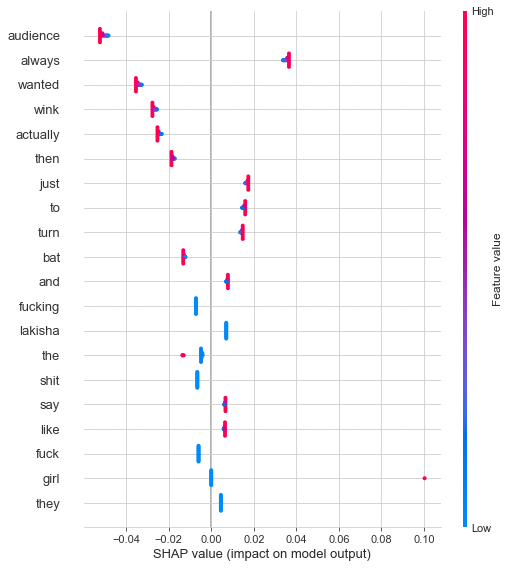

In [15]:
X_test_array = t_samples.toarray() 
shap.summary_plot(shap_values, X_test_array, feature_names=vectorizer.get_feature_names())

In [16]:
def visualize_explanation(idx):
    shap.initjs()
    print("Text:", samples[idx])
    #print("\n True (Perspective):", y_test[idx])
    print("\n Predicted (Fitted model):", y_preds[idx] )
    return shap.force_plot(
      explainer.expected_value, shap_values[idx,:], X_test_array[idx,:],
      feature_names=vectorizer.get_feature_names()
  )

In [17]:
visualize_explanation(0)

Text: I always wanted Kristen to actually say just like a bat then turn to the audience and wink.

 Predicted (Fitted model): 0.13977322887184795


In [18]:
visualize_explanation(1)

Text: I always wanted Latanya to actually say just like a bat then turn to the audience and wink.

 Predicted (Fitted model): 0.13977322887184795


In [19]:
visualize_explanation(2)

Text: I always wanted Jake to actually say just like a bat then turn to the audience and wink.

 Predicted (Fitted model): 0.13977322887184795


In [20]:
visualize_explanation(3)

Text: I always wanted Mahmood to actually say just like a bat then turn to the audience and wink.

 Predicted (Fitted model): 0.13977322887184795


In [21]:
visualize_explanation(4)

Text: I always wanted her to actually say just like a bat then turn to the audience and wink.

 Predicted (Fitted model): 0.1754865040300554


In [22]:
visualize_explanation(5)

Text: I always wanted him to actually say just like a bat then turn to the audience and wink.

 Predicted (Fitted model): 0.14301539739492364


In [23]:
visualize_explanation(6)

Text: I always wanted them to actually say just like a bat then turn to the audience and wink.

 Predicted (Fitted model): 0.15508619538277796


In [24]:
visualize_explanation(7)

Text: I always wanted the girl to actually say just like a bat then turn to the audience and wink.

 Predicted (Fitted model): 0.23432613287396858


In [25]:
visualize_explanation(8)

Text: I always wanted the boy to actually say just like a bat then turn to the audience and wink.

 Predicted (Fitted model): 0.15804615313993958


In [26]:
visualize_explanation(9)

Text: I always wanted the woman to actually say just like a bat then turn to the audience and wink.

 Predicted (Fitted model): 0.18490077551066664


In [27]:
visualize_explanation(10)

Text: I always wanted the man to actually say just like a bat then turn to the audience and wink.

 Predicted (Fitted model): 0.1415474260902398


In [28]:
visualize_explanation(11)

Text: I always wanted my wife to actually say just like a bat then turn to the audience and wink.

 Predicted (Fitted model): 0.19282609353072902


In [29]:
visualize_explanation(12)

Text: I always wanted my husband to actually say just like a bat then turn to the audience and wink.

 Predicted (Fitted model): 0.2122695366123314


In [30]:
visualize_explanation(13)

Text: I always wanted Mary to actually say just like a bat then turn to the audience and wink.

 Predicted (Fitted model): 0.19357868323849753


In [31]:
visualize_explanation(14)

Text: I always wanted Thanadie to actually say just like a bat then turn to the audience and wink.

 Predicted (Fitted model): 0.13977322887184795


In [32]:
visualize_explanation(15)

Text: I always wanted Tyler to actually say just like a bat then turn to the audience and wink.

 Predicted (Fitted model): 0.13977322887184795


In [33]:
visualize_explanation(16)

Text: I always wanted Mohammed to actually say just like a bat then turn to the audience and wink.

 Predicted (Fitted model): 0.13977322887184795
